In [2]:
import os

In [3]:
train_path='/home/deepaksr/project/project_assignment1/data2/data2/train'
valid_path='/home/deepaksr/project/project_assignment1/data2/data2/valid'
test_path='/home/deepaksr/project/project_assignment1/data2/data2/test'
def verify_data(folder):
  for classes in os.listdir(folder):
    class_path=os.path.join(folder,classes)
    if os.path.isdir(class_path):
      images = [i for i in os.listdir(class_path) if os.path.isfile(os.path.join(class_path,i))]
      counter = sum(1 for image in images if image.lower().endswith('.jpg'))
      print(f'class: {classes}')
      print(f'Images: {counter}\n')

print('Training Data:')
verify_data(train_path)
print('Validation Data:')
verify_data(valid_path)
print('Test Data:')
verify_data(test_path)

Training Data:
class: C390
Images: 60

class: KJ600
Images: 30

class: F117
Images: 304

class: J10
Images: 548

class: U2
Images: 272

class: C17
Images: 523

class: E7
Images: 153

class: A400M
Images: 383

class: A10
Images: 578

class: US2
Images: 546

class: Mirage2000
Images: 413

class: F16
Images: 1489

class: F14
Images: 435

class: KC135
Images: 209

class: J20
Images: 606

class: B2
Images: 426

class: XB70
Images: 151

class: Su57
Images: 303

class: JAS39
Images: 482

class: KF21
Images: 85

class: Su24
Images: 284

class: C5
Images: 303

class: WZ7
Images: 70

class: YF23
Images: 118

class: Be200
Images: 220

class: An72
Images: 70

class: P3
Images: 278

class: F35
Images: 1136

class: B21
Images: 20

class: F18
Images: 1402

class: JF17
Images: 149

class: MQ9
Images: 306

class: Tu95
Images: 293

class: Tornado
Images: 398

class: AV8B
Images: 372

class: B52
Images: 460

class: F4
Images: 566

class: F15
Images: 1281

class: TB2
Images: 340

class: AG600
Images: 182


Data Augmentation using ImageDataGenerator & Data Generator using flow_from_directory 
(https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#flow_from_directory)

In [4]:
import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator # type: ignore

2024-09-02 17:25:35.702710: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-02 17:25:35.728536: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-02 17:25:35.736326: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-02 17:25:35.754408: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-02 17:25:36.743903: W tensorflow/comp

In [5]:
datagen= ImageDataGenerator(rotation_range=10,width_shift_range=0.05,height_shift_range=0.05,
                            horizontal_flip=True, rescale=1.0/255)
train_generator = datagen.flow_from_directory(directory=train_path,
                                            target_size=(300,300),
                                            class_mode='categorical',
                                            batch_size=64,
                                            shuffle=True)
val_generator = datagen.flow_from_directory(directory=valid_path,
                                            target_size=(300,300),
                                            class_mode='categorical',
                                            batch_size=32,
                                            shuffle=True)
test_generator = datagen.flow_from_directory(directory=test_path,
                                            target_size=(300,300),
                                            class_mode='categorical',
                                            batch_size=32,
                                            shuffle=False)

print(train_generator.class_indices)
print(train_generator.samples)
print(val_generator.class_indices)
print(val_generator.samples)
print(test_generator.class_indices)
print(test_generator.samples)

Found 24383 images belonging to 60 classes.
Found 2175 images belonging to 60 classes.
Found 1006 images belonging to 60 classes.
{'A10': 0, 'A400M': 1, 'AG600': 2, 'AV8B': 3, 'An72': 4, 'B1': 5, 'B2': 6, 'B21': 7, 'B52': 8, 'Be200': 9, 'C130': 10, 'C17': 11, 'C2': 12, 'C390': 13, 'C5': 14, 'E2': 15, 'E7': 16, 'EF2000': 17, 'F117': 18, 'F14': 19, 'F15': 20, 'F16': 21, 'F18': 22, 'F22': 23, 'F35': 24, 'F4': 25, 'H6': 26, 'J10': 27, 'J20': 28, 'JAS39': 29, 'JF17': 30, 'JH7': 31, 'KC135': 32, 'KF21': 33, 'KJ600': 34, 'MQ9': 35, 'Mig31': 36, 'Mirage2000': 37, 'P3': 38, 'RQ4': 39, 'Rafale': 40, 'SR71': 41, 'Su24': 42, 'Su25': 43, 'Su34': 44, 'Su57': 45, 'TB001': 46, 'TB2': 47, 'Tornado': 48, 'Tu160': 49, 'Tu22M': 50, 'Tu95': 51, 'U2': 52, 'US2': 53, 'V22': 54, 'Vulcan': 55, 'WZ7': 56, 'XB70': 57, 'Y20': 58, 'YF23': 59}
24383
{'A10': 0, 'A400M': 1, 'AG600': 2, 'AV8B': 3, 'An72': 4, 'B1': 5, 'B2': 6, 'B21': 7, 'B52': 8, 'Be200': 9, 'C130': 10, 'C17': 11, 'C2': 12, 'C390': 13, 'C5': 14, 'E2': 

In [18]:
x_train_batch, y_train_batch = next(train_generator)
x_valid_batch, y_valid_batch = next(val_generator)
x_test_batch, y_test_batch = next(test_generator)

print(f"Training batch shape: {x_train_batch.shape}, Labels shape: {y_train_batch.shape}")
print(f"Validation batch shape: {x_valid_batch.shape}, Labels shape: {y_valid_batch.shape}")
print(f"Test batch shape: {x_test_batch.shape}, Labels shape: {y_test_batch.shape}")

Training batch shape: (64, 300, 300, 3), Labels shape: (64, 60)
Validation batch shape: (32, 300, 300, 3), Labels shape: (32, 60)
Test batch shape: (32, 300, 300, 3), Labels shape: (32, 60)


Define the CNN using keras.models & keras.layers

In [6]:
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout # type: ignore
from tensorflow.keras.optimizers import Adam # type: ignore
from tensorflow.keras.utils import plot_model # type: ignore

In [7]:
def get_CNN():
  net=Sequential()
  net.add(Conv2D(32,(5,5),activation='relu', input_shape=(300,300,3)))
  net.add(MaxPooling2D(2,2))
  net.add(Conv2D(64,(3,3), activation='relu'))
  net.add(MaxPooling2D(2,2))
  net.add(Conv2D(128,(3,3), activation='relu'))
  net.add(MaxPooling2D(2,2))
  net.add(Conv2D(256,(3,3), activation='relu'))
  net.add(MaxPooling2D(2,2))
  net.add(Dropout(0.25))
  net.add(Conv2D(512,(3,3), activation='relu'))
  net.add(MaxPooling2D(2,2))
  net.add(Flatten())
  net.add(Dense(512, activation='relu'))
  net.add(Dense(128, activation='relu'))
  net.add(Dropout(0.25))
  net.add(Dense(60, activation='softmax'))
  net.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
  return net

In [8]:
model=get_CNN()
model.summary()

/home/deepaksr/miniconda3/envs/cnn/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-09-02 17:25:42.162012: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2021] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9798 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:3b:00.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 296, 296, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 148, 148, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 146, 146, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 71, 71, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 35, 35, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 33, 33, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 60)             │         7,740 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,489,084 (55.27 MB)

 Trainable params: 14,489,084 (55.27 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history = model.fit(train_generator, validation_data=val_generator, epochs=25)

Epoch 1/25


/home/deepaksr/miniconda3/envs/cnn/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1725204414.944076 2314180 service.cc:146] XLA service 0x7f10f00053c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1725204414.944150 2314180 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 2080 Ti, Compute Capability 7.5
2024-09-01 20:56:55.040941: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-09-01 20:56:55.422097: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907

  1/381 ━━━━━━━━━━━━━━━━━━━━ 2:14:09 21s/step - accuracy: 0.0625 - loss: 4.0885

I0000 00:00:1725204423.045001 2314180 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


381/381 ━━━━━━━━━━━━━━━━━━━━ 585s 1s/step - accuracy: 0.0478 - loss: 3.9753 - val_accuracy: 0.0428 - val_loss: 3.9389
Epoch 2/25
381/381 ━━━━━━━━━━━━━━━━━━━━ 561s 1s/step - accuracy: 0.0575 - loss: 3.8593 - val_accuracy: 0.0391 - val_loss: 3.9091
Epoch 3/25
381/381 ━━━━━━━━━━━━━━━━━━━━ 552s 1s/step - accuracy: 0.0678 - loss: 3.7838 - val_accuracy: 0.0736 - val_loss: 3.8376
Epoch 4/25
381/381 ━━━━━━━━━━━━━━━━━━━━ 547s 1s/step - accuracy: 0.0928 - loss: 3.6894 - val_accuracy: 0.0938 - val_loss: 3.7035
Epoch 5/25
381/381 ━━━━━━━━━━━━━━━━━━━━ 551s 1s/step - accuracy: 0.1249 - loss: 3.5511 - val_accuracy: 0.1375 - val_loss: 3.5671
Epoch 6/25
381/381 ━━━━━━━━━━━━━━━━━━━━ 555s 1s/step - accuracy: 0.1592 - loss: 3.3876 - val_accuracy: 0.1517 - val_loss: 3.4944
Epoch 7/25
381/381 ━━━━━━━━━━━━━━━━━━━━ 552s 1s/step - accuracy: 0.2069 - loss: 3.1974 - val_accuracy: 0.1936 - val_loss: 3.2969
Epoch 8/25
381/381 ━━━━━━━━━━━━━━━━━━━━ 560s 1s/step - accuracy: 0.2441 - loss: 3.0258 - val_accuracy: 0.212

In [12]:
history_dict = history.history

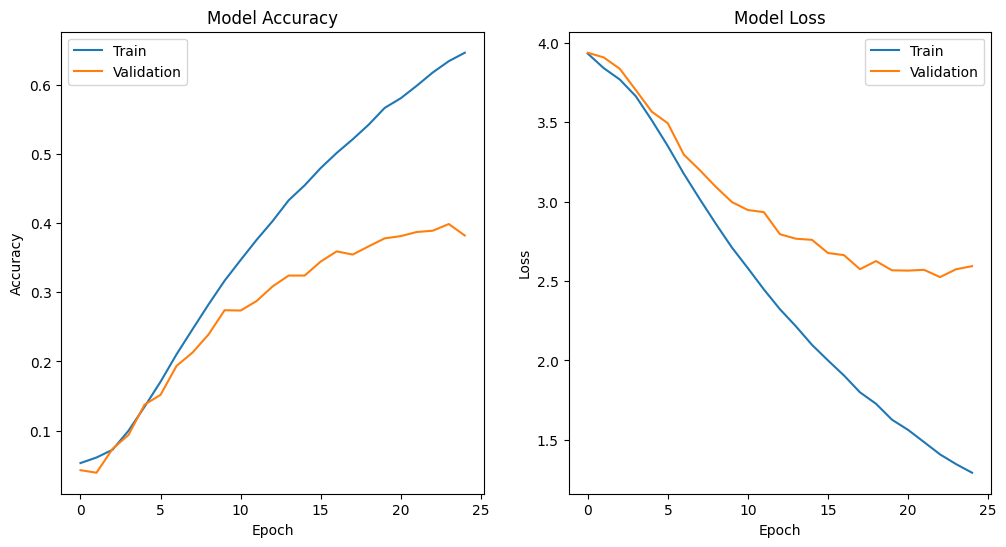

In [13]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_dict['accuracy'])
plt.plot(history_dict['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_dict['loss'])
plt.plot(history_dict['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

plt.show()

Obtaining Predictions for testing & evaluation

In [14]:
import numpy as np
y_pred_prob=model.predict(test_generator)
y_pred=np.argmax(y_pred_prob, axis=1)
print(y_pred)
y_true=test_generator.classes
y_true

/home/deepaksr/miniconda3/envs/cnn/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


32/32 ━━━━━━━━━━━━━━━━━━━━ 23s 685ms/step
[21  0  0 ... 24 10 28]


array([ 0,  0,  0, ..., 59, 59, 59], dtype=int32)

In [15]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, classification_report
accuracy = accuracy_score(y_true,y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')
print(f'Accuracy : {accuracy:.4f}')
print(f'Precision : {precision:.4f}')
print(f'Recall : {recall:.4f}')
print(f'F1 Score : {f1:.4f}')
print('Classification Report:\n', classification_report(y_true, y_pred,target_names=test_generator.class_indices.keys()))


Accuracy : 0.3797
Precision : 0.4327
Recall : 0.3797
F1 Score : 0.3802
Classification Report:
               precision    recall  f1-score   support

         A10       0.35      0.40      0.37        20
       A400M       0.44      0.35      0.39        20
       AG600       0.82      0.45      0.58        20
        AV8B       0.67      0.50      0.57        20
        An72       0.00      0.00      0.00        10
          B1       0.41      0.45      0.43        20
          B2       0.54      0.35      0.42        20
         B21       0.00      0.00      0.00         4
         B52       0.50      0.60      0.55        20
       Be200       0.71      0.36      0.48        14
        C130       0.18      0.55      0.28        20
         C17       0.33      0.40      0.36        20
          C2       0.53      0.80      0.64        20
        C390       0.50      0.12      0.20         8
          C5       0.35      0.30      0.32        20
          E2       0.54      0.35      0

/home/deepaksr/miniconda3/envs/cnn/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/deepaksr/miniconda3/envs/cnn/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/deepaksr/miniconda3/envs/cnn/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
print(cm)

[[8 0 0 ... 0 0 0]
 [0 7 0 ... 0 0 0]
 [0 2 9 ... 0 0 0]
 ...
 [0 0 0 ... 4 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 1]]


In [9]:
history = model.fit(train_generator, validation_data=val_generator, epochs=50)

Epoch 1/50


/home/deepaksr/miniconda3/envs/cnn/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1725278167.366560 2530523 service.cc:146] XLA service 0x7fc9500046e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1725278167.366615 2530523 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 2080 Ti, Compute Capability 7.5
2024-09-02 17:26:07.454215: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-09-02 17:26:07.782834: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907

  1/381 ━━━━━━━━━━━━━━━━━━━━ 2:15:48 21s/step - accuracy: 0.0000e+00 - loss: 4.0991

I0000 00:00:1725278175.811937 2530523 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


381/381 ━━━━━━━━━━━━━━━━━━━━ 590s 1s/step - accuracy: 0.0458 - loss: 3.9680 - val_accuracy: 0.0497 - val_loss: 3.9533
Epoch 2/50
381/381 ━━━━━━━━━━━━━━━━━━━━ 560s 1s/step - accuracy: 0.0628 - loss: 3.8515 - val_accuracy: 0.0680 - val_loss: 3.8361
Epoch 3/50
381/381 ━━━━━━━━━━━━━━━━━━━━ 560s 1s/step - accuracy: 0.0808 - loss: 3.7419 - val_accuracy: 0.0809 - val_loss: 3.7695
Epoch 4/50
381/381 ━━━━━━━━━━━━━━━━━━━━ 561s 1s/step - accuracy: 0.1084 - loss: 3.6281 - val_accuracy: 0.1145 - val_loss: 3.6475
Epoch 5/50
381/381 ━━━━━━━━━━━━━━━━━━━━ 559s 1s/step - accuracy: 0.1430 - loss: 3.4594 - val_accuracy: 0.1430 - val_loss: 3.5174
Epoch 6/50
381/381 ━━━━━━━━━━━━━━━━━━━━ 563s 1s/step - accuracy: 0.1789 - loss: 3.3097 - val_accuracy: 0.1623 - val_loss: 3.3970
Epoch 7/50
381/381 ━━━━━━━━━━━━━━━━━━━━ 559s 1s/step - accuracy: 0.2177 - loss: 3.1503 - val_accuracy: 0.1986 - val_loss: 3.2700
Epoch 8/50
381/381 ━━━━━━━━━━━━━━━━━━━━ 561s 1s/step - accuracy: 0.2559 - loss: 2.9734 - val_accuracy: 0.215

In [10]:
history_dict = history.history

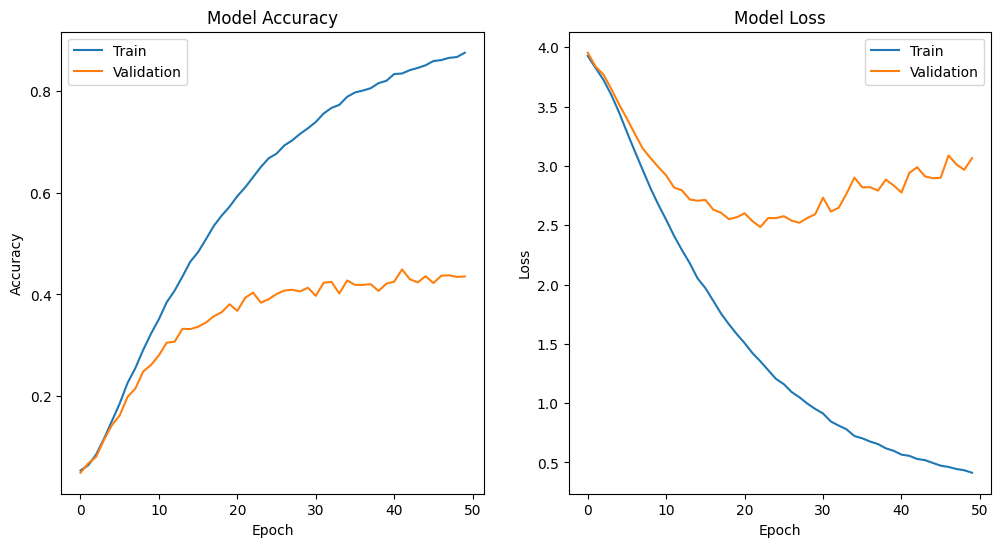

In [11]:
import matplotlib.pyplot as plt # type: ignore

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_dict['accuracy'])
plt.plot(history_dict['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_dict['loss'])
plt.plot(history_dict['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

plt.show()

Obtaining Predictions for testing & evaluation

In [12]:
import numpy as np # type: ignore
y_pred_prob=model.predict(test_generator)
y_pred=np.argmax(y_pred_prob, axis=1)
print(y_pred)
y_true=test_generator.classes
y_true

/home/deepaksr/miniconda3/envs/cnn/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


32/32 ━━━━━━━━━━━━━━━━━━━━ 22s 676ms/step
[18  0  0 ... 24 19  5]


array([ 0,  0,  0, ..., 59, 59, 59], dtype=int32)

In [13]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, classification_report # type: ignore
accuracy = accuracy_score(y_true,y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')
print(f'Accuracy : {accuracy:.4f}')
print(f'Precision : {precision:.4f}')
print(f'Recall : {recall:.4f}')
print(f'F1 Score : {f1:.4f}')
print('Classification Report:\n', classification_report(y_true, y_pred,target_names=test_generator.class_indices.keys()))


Accuracy : 0.4076
Precision : 0.4649
Recall : 0.4076
F1 Score : 0.4103
Classification Report:
               precision    recall  f1-score   support

         A10       0.57      0.60      0.59        20
       A400M       0.64      0.35      0.45        20
       AG600       0.88      0.35      0.50        20
        AV8B       0.71      0.60      0.65        20
        An72       0.25      0.10      0.14        10
          B1       0.33      0.50      0.40        20
          B2       0.29      0.35      0.32        20
         B21       0.00      0.00      0.00         4
         B52       0.48      0.60      0.53        20
       Be200       0.71      0.36      0.48        14
        C130       0.33      0.55      0.42        20
         C17       0.32      0.30      0.31        20
          C2       0.53      0.90      0.67        20
        C390       0.50      0.12      0.20         8
          C5       0.38      0.25      0.30        20
          E2       0.50      0.30      0

In [14]:
from sklearn.metrics import confusion_matrix # type: ignore
cm = confusion_matrix(y_true, y_pred)
print(cm)

[[12  0  0 ...  0  0  0]
 [ 0  7  0 ...  0  0  0]
 [ 0  0  7 ...  0  0  0]
 ...
 [ 0  0  0 ...  2  0  0]
 [ 0  0  0 ...  0  5  0]
 [ 0  0  0 ...  0  0  1]]
